Import dependencies

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline

Load data from csv and extract independent variables (X) and dependent variable (Y)

In [4]:
data = pd.read_csv('../data/capacity.csv')
X = data.drop('capacity', axis=1)  # Drop the target column
y = data['capacity']  # Select only the target column

Create model pipeline and make the model learn from data

In [5]:
pipe = Pipeline([
    ('preprocessor', OneHotEncoder(sparse_output=False, drop='first')),
    ('model', KNeighborsRegressor())
])
pipe.fit(X, y)

Pipeline(steps=[('preprocessor',
                 OneHotEncoder(drop='first', sparse_output=False)),
                ('model', KNeighborsRegressor())])

Sample Prediction

In [9]:
print(pipe.predict(pd.DataFrame({
    'studio': ['s5'],
    'day': ['d6'],
    'program': ['p106'],
    'coach': ['c206'],
    'timeslot': ['t304']
})))

[54.4]


Compare prediction to actual values

In [10]:
pred = pipe.predict(X)

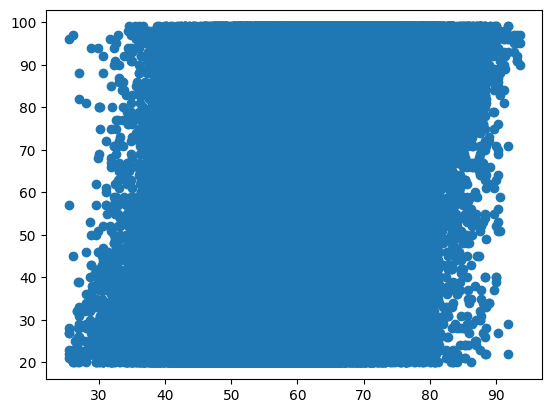

In [13]:
plt.scatter(pred, y)